# Bollinger %b

https://www.incrediblecharts.com/indicators/bollinger_percentage_b.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106258,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777885,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069557,158066000


In [3]:
n = 20

# Calculate Moving Average and Standard Deviation
df['SMA'] = df['Adj Close'].rolling(n).mean()
df['STD'] = df['Adj Close'].rolling(n).std()

# Calculate Bollinger Bands
df['Upper Bollinger Band'] = df['SMA'] + 2 * df['STD']
df['Lower Bollinger Band'] = df['SMA'] - 2 * df['STD']

# Calculate Bollinger %b
df['Bollinger %b'] = (df['Adj Close'] - df['Lower Bollinger Band']) / (df['Upper Bollinger Band'] - df['Lower Bollinger Band'])

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper Bollinger Band,Lower Bollinger Band,Bollinger %b
Date,,,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN,NaN,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106258,133332000,NaN,NaN,NaN,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,NaN,NaN,NaN,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777885,150479200,NaN,NaN,NaN,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069557,158066000,NaN,NaN,NaN,NaN,NaN


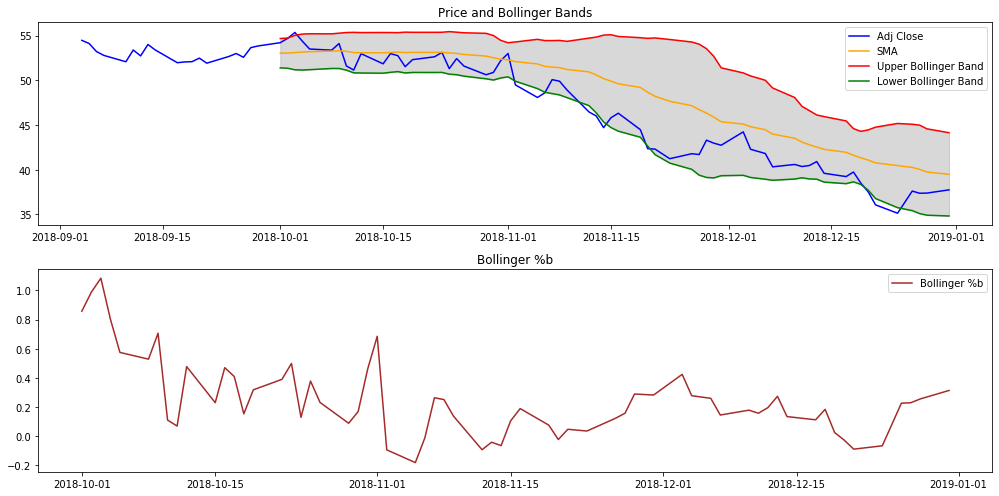

In [5]:
# Plot the data
plt.figure(figsize=(14, 7))

# Price and Bollinger Bands
plt.subplot(2, 1, 1)
plt.plot(df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df['SMA'], label='SMA', color='orange')
plt.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band', color='red')
plt.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band', color='green')
plt.fill_between(df.index, df['Lower Bollinger Band'], df['Upper Bollinger Band'], color='gray', alpha=0.3)
plt.title('Price and Bollinger Bands')
plt.legend()

# Bollinger %b
plt.subplot(2, 1, 2)
plt.plot(df['Bollinger %b'], label='Bollinger %b', color='brown')
plt.title('Bollinger %b')
plt.legend()

plt.tight_layout()
plt.show()

## Candlestick with Bollinger %b

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper Bollinger Band,Lower Bollinger Band,Bollinger %b,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461620,109560400,NaN,NaN,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106258,133332000,NaN,NaN,NaN,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,NaN,NaN,NaN,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777885,150479200,NaN,NaN,NaN,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069557,158066000,NaN,NaN,NaN,NaN,NaN,False


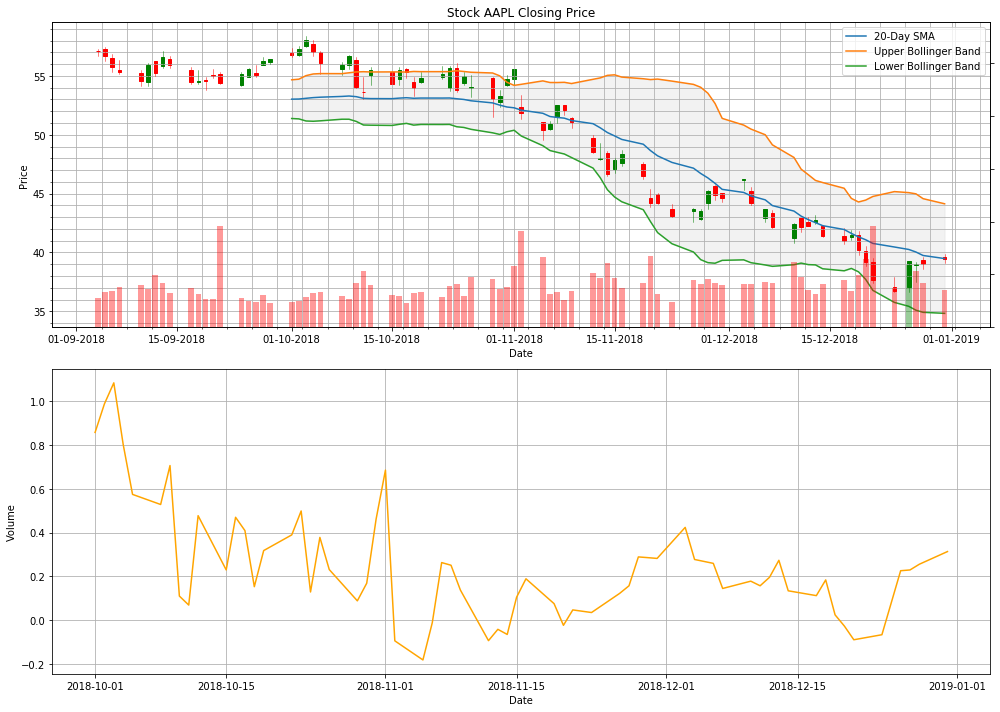

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['SMA'], label=f'{n}-Day SMA')
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax1.fill_between(df.index, df['Lower Bollinger Band'], df['Upper Bollinger Band'], color='grey', alpha=0.1)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc['Date'], dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc['Volume'].max())
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['Bollinger %b'], label='Bollinger %b', color='orange')
ax2.grid(True)
ax2.set_ylabel('Bollinger %b')
ax2.set_xlabel('Date')
plt.tight_layout()
plt.show()

In [8]:
# Define the Bollinger %b strategy conditions
def apply_bollinger_strategy(df):
    df['Long'] = np.nan
    df['Exit'] = np.nan

    # Identify long entry points
    for i in range(1, len(df)):
        if (df['Bollinger %b'].iloc[i-1] < 0) and (df['Bollinger %b'].iloc[i] >= 0):
            df['Long'].iloc[i] = df['Close'].iloc[i]
        elif (df['Bollinger %b'].iloc[i-1] >= 0) and (df['Bollinger %b'].iloc[i] > 0) and (df['Bollinger %b'].iloc[i-1] == 0):
            df['Long'].iloc[i] = df['Close'].iloc[i]

    # Identify exit points
    for i in range(1, len(df)):
        if (df['Bollinger %b'].iloc[i-1] > 100) and (df['Bollinger %b'].iloc[i] < 100):
            df['Exit'].iloc[i] = df['Close'].iloc[i]
        elif (df['Bollinger %b'].iloc[i-1] < 100) and (df['Bollinger %b'].iloc[i] >= 100):
            df['Exit'].iloc[i] = df['Close'].iloc[i]

    return df


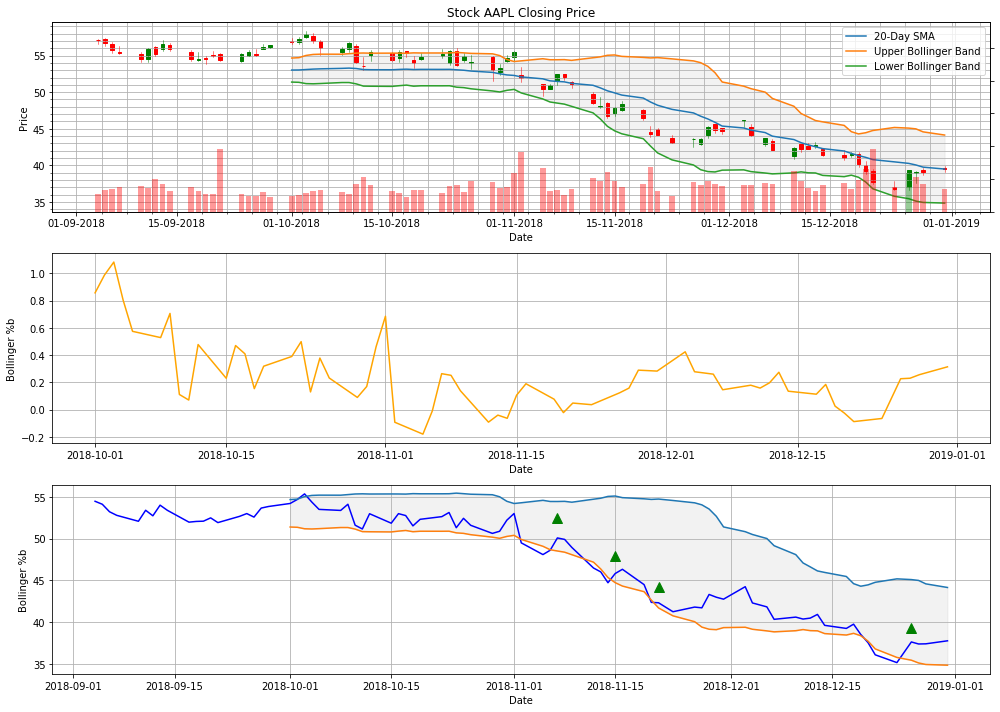

<Figure size 432x288 with 0 Axes>

In [9]:
df = apply_bollinger_strategy(df)

fig = plt.figure(figsize=(14, 10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1, dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['SMA'], label=f'{n}-Day SMA')
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax1.fill_between(df.index, df['Lower Bollinger Band'], df['Upper Bollinger Band'], color='grey', alpha=0.1)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc['Date'], dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc['Volume'].max())
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df.index, df['Bollinger %b'], label='Bollinger %b', color='orange')
ax2.grid(True)
ax2.set_ylabel('Bollinger %b')
ax2.set_xlabel('Date')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
ax3.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax3.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax3.fill_between(df.index, df['Lower Bollinger Band'], df['Upper Bollinger Band'], color='grey', alpha=0.1)
ax3.plot(df.index, df['Long'], marker='^', markersize=10, color='g', linestyle='None', label='Long Signal')
ax3.plot(df.index, df['Exit'], marker='v', markersize=10, color='r', linestyle='None', label='Exit Signal')
ax3.grid(True)
ax3.set_ylabel('Bollinger %b')
ax3.set_xlabel('Date')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

